In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data  Exploration and Familiarisation

In [ ]:
df = pd.read_csv('customer_churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


TotalCharges seem to be non numeric. But there is no currency sign

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


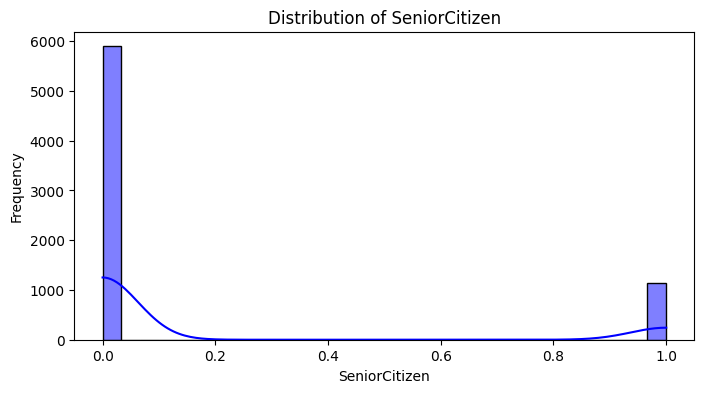

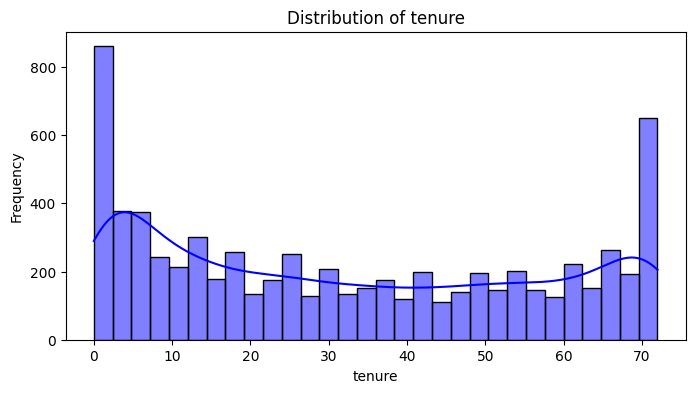

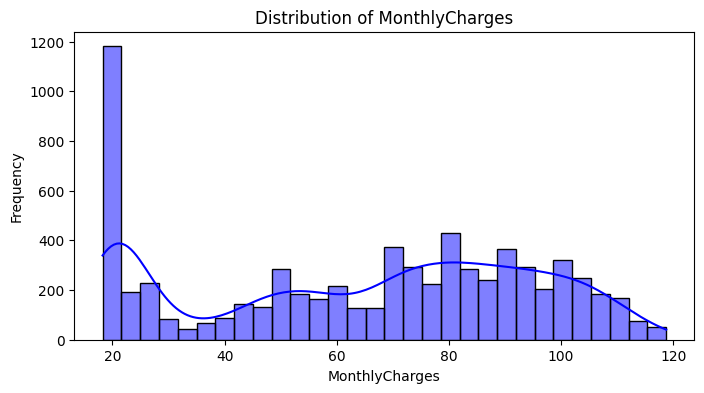

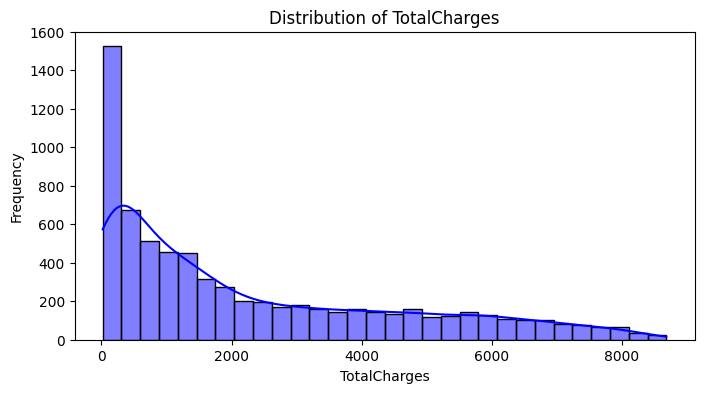

In [ ]:
numerical_columns = df.select_dtypes(include=['float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Numerical data is skewed. So I am filling the missing values by median. But tenure seems to have values at 0. The customer has to have a tenure to be valid.

In [ ]:
zero_tenure_rows = df[df['tenure'] == 0]
zero_tenure_rows.shape

(11, 21)

In [ ]:
zero_tenure_rows['Churn'].value_counts(dropna=False)

,count
Churn,
No,11


Dropping zero tenure rows as they are No Churn customers and only a very small number: 11

In [ ]:
df = df[df['tenure'] != 0]

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


Missing values of tenure are dropped. There are only 13 values

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column]=df[column].fillna(df[column].mode()[0])

<ipython-input-76-e506d421ee3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=df[column].fillna(df[column].mode()[0])


In [ ]:
df = df.dropna(subset=['tenure'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7019 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7019 non-null   object 
 1   gender            7019 non-null   object 
 2   SeniorCitizen     7012 non-null   float64
 3   Partner           7019 non-null   object 
 4   Dependents        7019 non-null   object 
 5   tenure            7019 non-null   float64
 6   PhoneService      7019 non-null   object 
 7   MultipleLines     7019 non-null   object 
 8   InternetService   7019 non-null   object 
 9   OnlineSecurity    7019 non-null   object 
 10  OnlineBackup      7019 non-null   object 
 11  DeviceProtection  7019 non-null   object 
 12  TechSupport       7019 non-null   object 
 13  StreamingTV       7019 non-null   object 
 14  StreamingMovies   7019 non-null   object 
 15  Contract          7019 non-null   object 
 16  PaperlessBilling  7019 non-null   object 
 17  

In [ ]:
df['MonthlyCharges']=df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df['TotalCharges']= df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])
df['SeniorCitizen']=df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0])

In [ ]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Missing values have beeen handled. Now we can check outlier. No outlier was found in Monthly charges, so it follows that Total charges will be same as its derived from Monthly Charges

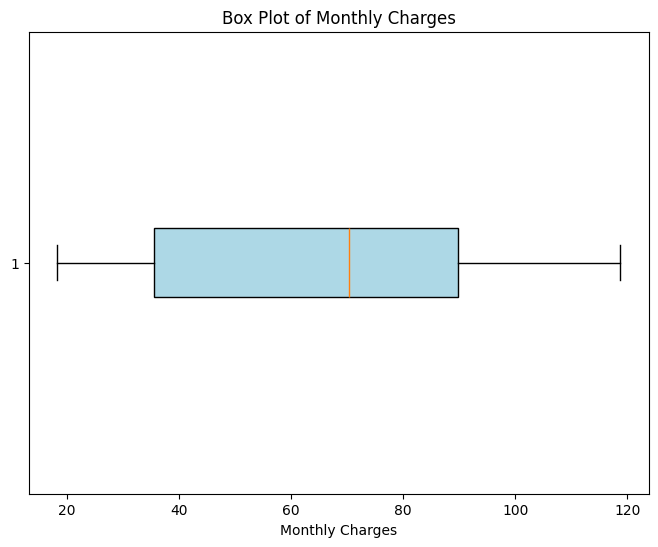

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['MonthlyCharges'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()

## Encoding and Scaling

In [ ]:
df = df.drop('customerID', axis=1)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print('\n')

Value counts for column 'gender':
gender
Male      3542
Female    3477
Name: count, dtype: int64


Value counts for column 'Partner':
Partner
No     3632
Yes    3387
Name: count, dtype: int64


Value counts for column 'Dependents':
Dependents
No     4925
Yes    2094
Name: count, dtype: int64


Value counts for column 'PhoneService':
PhoneService
Yes    6340
No      679
Name: count, dtype: int64


Value counts for column 'MultipleLines':
MultipleLines
No                  3377
Yes                 2963
No phone service     679
Name: count, dtype: int64


Value counts for column 'InternetService':
InternetService
Fiber optic    3105
DSL            2402
No             1512
Name: count, dtype: int64


Value counts for column 'OnlineSecurity':
OnlineSecurity
No                     3493
Yes                    2009
No internet service    1517
Name: count, dtype: int64


Value counts for column 'OnlineBackup':
OnlineBackup
No                     3084
Yes                    2418
No internet servi

Label encoding is used for ease depending on the number of unique values in columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7019 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7019 non-null   int64  
 1   SeniorCitizen     7019 non-null   float64
 2   Partner           7019 non-null   int64  
 3   Dependents        7019 non-null   int64  
 4   tenure            7019 non-null   float64
 5   PhoneService      7019 non-null   int64  
 6   MultipleLines     7019 non-null   int64  
 7   InternetService   7019 non-null   int64  
 8   OnlineSecurity    7019 non-null   int64  
 9   OnlineBackup      7019 non-null   int64  
 10  DeviceProtection  7019 non-null   int64  
 11  TechSupport       7019 non-null   int64  
 12  StreamingTV       7019 non-null   int64  
 13  StreamingMovies   7019 non-null   int64  
 14  Contract          7019 non-null   int64  
 15  PaperlessBilling  7019 non-null   int64  
 16  PaymentMethod     7019 non-null   int64  
 17  

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['Churn'])
y = df['Churn'] # 0 for No and 1 for Yes after encoding

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model Training

I am trying both svm, decision tree and random forest

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
sv = SVC(kernel='linear')
sv.fit(x_train,y_train)
y_pred_svm = sv.predict(x_test)

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_svm))
print('\nClassification Report :\n',classification_report(y_test,y_pred_svm))

Accuracy : 0.7981956315289649

Confusion Matrix 
 [[1384  172]
 [ 253  297]]

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.63      0.54      0.58       550

    accuracy                           0.80      2106
   macro avg       0.74      0.71      0.72      2106
weighted avg       0.79      0.80      0.79      2106



In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_pred_dt))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_dt))
print('\nClassification Report :\n',classification_report(y_test,y_pred_dt))

Accuracy : 0.7293447293447294

Confusion Matrix 
 [[1255  301]
 [ 269  281]]

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1556
           1       0.48      0.51      0.50       550

    accuracy                           0.73      2106
   macro avg       0.65      0.66      0.66      2106
weighted avg       0.73      0.73      0.73      2106



In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_pred_rf))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_rf))
print('\nClassification Report :\n',classification_report(y_test,y_pred_rf))

Accuracy : 0.7934472934472935

Confusion Matrix 
 [[1410  146]
 [ 289  261]]

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1556
           1       0.64      0.47      0.55       550

    accuracy                           0.79      2106
   macro avg       0.74      0.69      0.71      2106
weighted avg       0.78      0.79      0.78      2106



# SVM model seems to give the best result in accuracy of 79.8. Closely followed by Random Forest. Decision tree has a lesser accuracy at 72.9%. So SVM is final choice.